Week 5 - Lab 02 - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [155]:
df = pd.read_csv('/Users/marco_mo/Ironhack/Week05/W05Lab01/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [157]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


Part 1: Analyzing Best-Seller Trends Across Product Categories

In [294]:
# Crosstab analysis
crosstab_cat_best = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_cat_best

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [313]:
crosstab_cat_best2 = pd.crosstab(df['category'], df['isBestSeller'])
total_counts_ccb = crosstab_cat_best2.sum(axis=1)
crosstab_cat_best2['False_prop'] = crosstab_cat_best2[False] / total_counts_ccb
crosstab_cat_best2['True_prop'] = crosstab_cat_best2[True] / total_counts_ccb
crosstab_cat_best2

isBestSeller,False,True,False_prop,True_prop
category,,,,
3D Printers,247,1,0.995968,0.004032
3D Printing & Scanning,4065,2,0.999508,0.000492
Abrasive & Finishing Products,245,5,0.980000,0.020000
Action Cameras,1696,1,0.999411,0.000589
Adapters,251,3,0.988189,0.011811
...,...,...,...,...
Wind Instruments,243,7,0.972000,0.028000
Window Treatments,234,5,0.979079,0.020921
Women,17559,213,0.988015,0.011985


In [322]:
crosstab_cat_best3 = crosstab_cat_best2[['False_prop', 'True_prop']]
crosstab_cat_best3

isBestSeller,False_prop,True_prop
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [302]:
crosstab_cat_best_sorted = crosstab_cat_best2.sort_values(by='True_prop', ascending=False)
crosstab_cat_best_sorted.head(10)

isBestSeller,False,True,False_prop,True_prop
category,,,,
Grocery,9008,556,0.941865,0.058135
Smart Home Security & Lighting,98,6,0.942308,0.057692
Health & Personal Care,9017,552,0.942314,0.057686
Mobile Phone Accessories,248,11,0.957529,0.042471
Power & Hand Tools,8353,306,0.964661,0.035339
"Billiard, Snooker & Pool",241,8,0.967871,0.032129
Pet Supplies,9152,285,0.969800,0.030200
Home Brewing & Wine Making,239,7,0.971545,0.028455
Wind Instruments,243,7,0.972000,0.028000


In [202]:
# Statistical Tests
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_cat_best)
chi2_statistic, chi2_p_value


(40163.06452525318, 0.0)

In [204]:
from scipy.stats.contingency import association
association(crosstab_cat_best, method="cramer")

ValueError: `observed` must be an integer array.

In [ ]:
# Visualizations

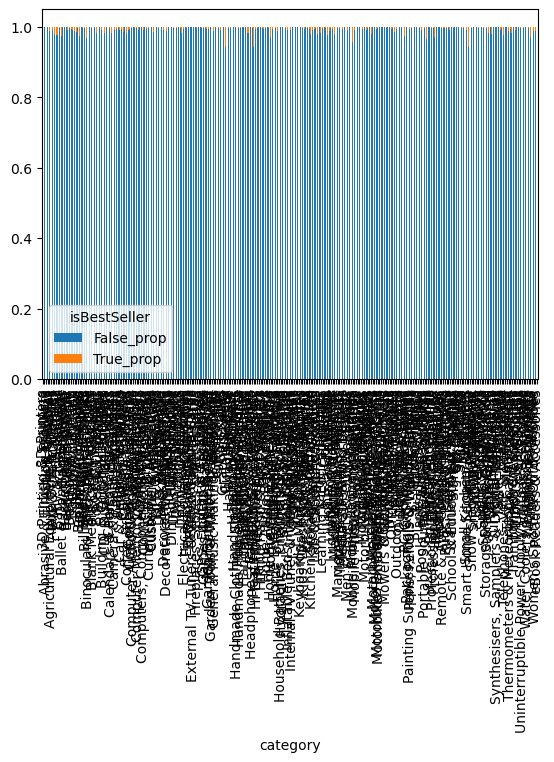

In [324]:
crosstab_cat_best3.plot(kind="bar", stacked=True);

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [342]:
# 0 - Preliminary Step: Remove outliers in product prices.

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [344]:
# Outlier test

data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [346]:
df_no_out = df[~df['price'].isin(outliers)]
df_no_out

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<Axes: xlabel='price', ylabel='category'>

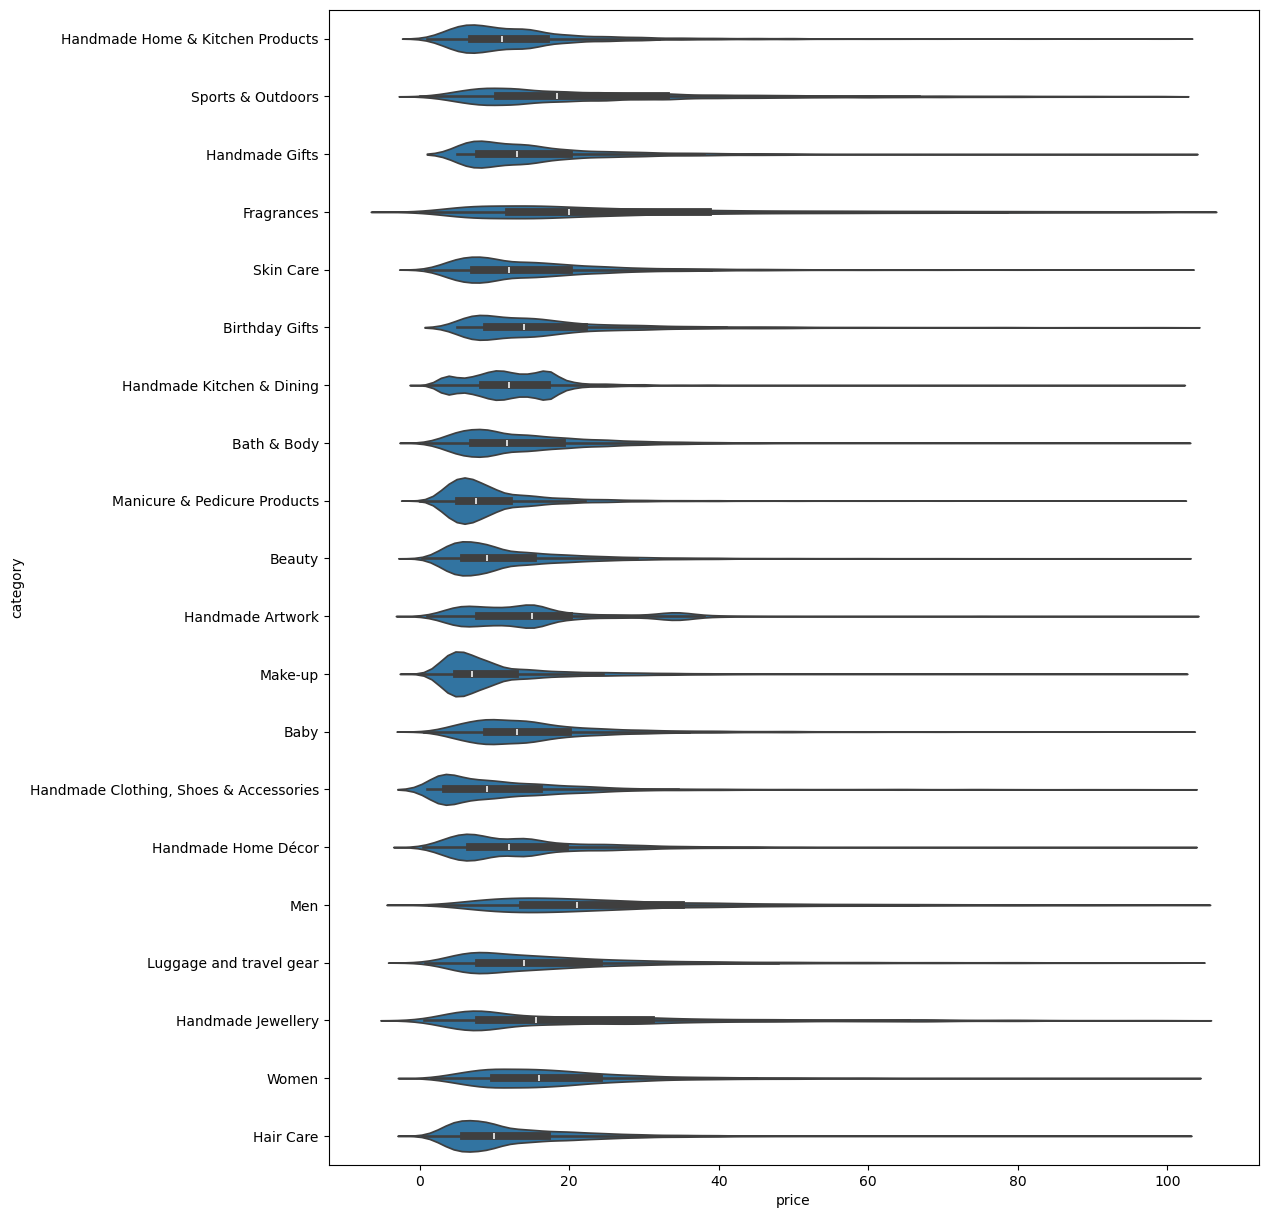

In [348]:
# Violin Plot
# Distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization

# top 20 categories
top_categories = df_no_out['category'].value_counts().nlargest(20).index
# top 20 df
df_top_20 = df_no_out[df_no_out['category'].isin(top_categories)]
# plot size
plt.figure(figsize=(12, 15))  # Adjust the height to 15
# violin plot
sns.violinplot(data=df_top_20, x='price', y='category', legend=False)

In [350]:
# Median price by category
median_price_cat = df_no_out.groupby('category')['price'].median()
median_price_cat

category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

In [352]:
category_with_max_median = median_price_cat.idxmax()
max_median = median_price_cat.max()
category_with_max_median, max_median

('Desktop PCs', 74.0)

<Axes: ylabel='category'>

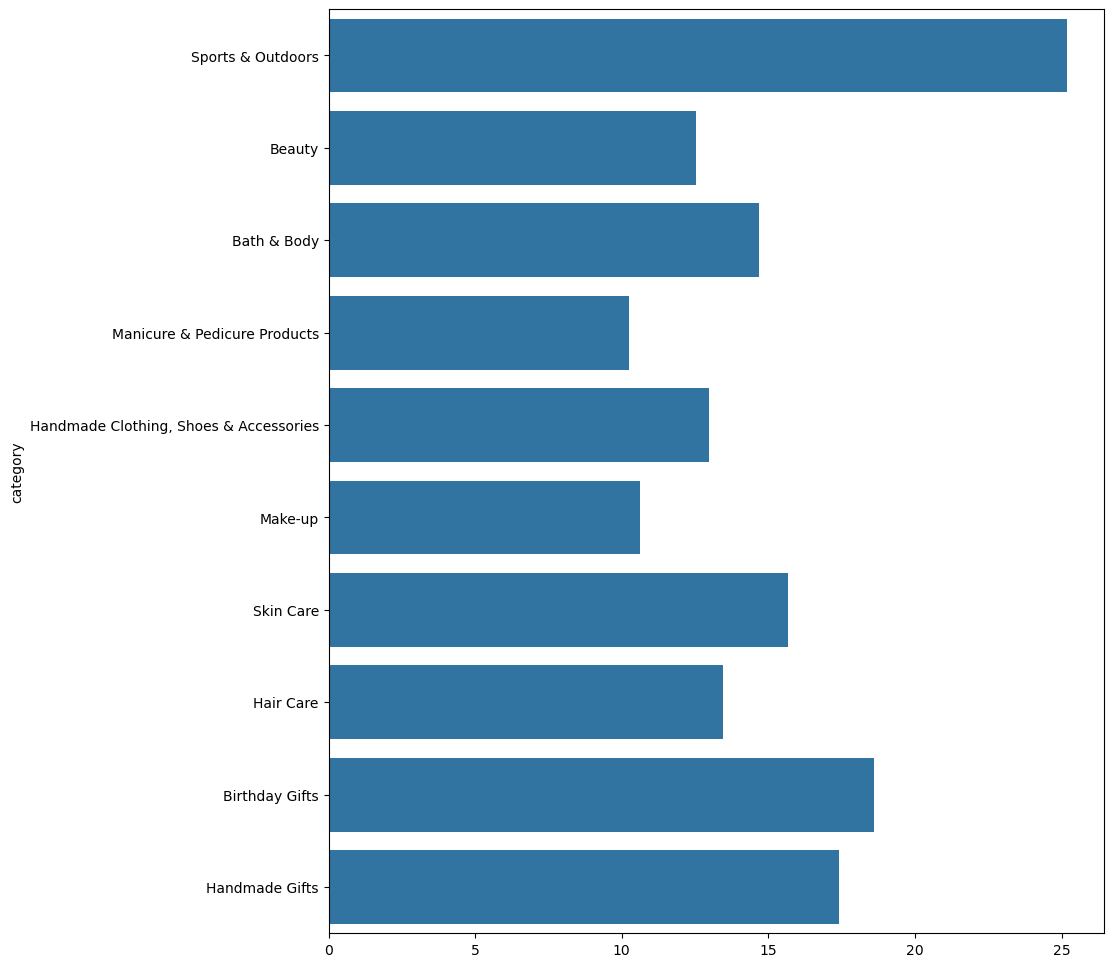

In [354]:
# Bar charts
# average price of products for the top 10 product categories (based on count)

# average per category
average_price_cat = df_no_out.groupby('category')['price'].mean()
# top 10 categories
top10_cat = df_no_out['category'].value_counts().nlargest(10).index
# top 10 with avg
avg_price_top10 = average_price_cat.loc[top10_cat]
# bar chart
plt.figure(figsize=(10, 12)) 
sns.barplot(x=avg_price_top10.values, y=avg_price_top10.index)

In [356]:
# Highest average per category
avg_price_cat = df_no_out.groupby('category')['price'].mean()
avg_price_cat

category
3D Printers                       55.739722
3D Printing & Scanning            35.623904
Abrasive & Finishing Products     14.427611
Action Cameras                    38.936875
Adapters                           8.750197
                                    ...    
Wind Instruments                  18.935339
Window Treatments                 19.870633
Women                             20.408735
Women's Sports & Outdoor Shoes    49.425894
eBook Readers & Accessories       26.006952
Name: price, Length: 296, dtype: float64

In [358]:
category_max_avg = avg_price_cat.idxmax()
max_avg = avg_price_cat.max()
category_max_avg, max_avg

('Motherboards', 68.77243243243242)

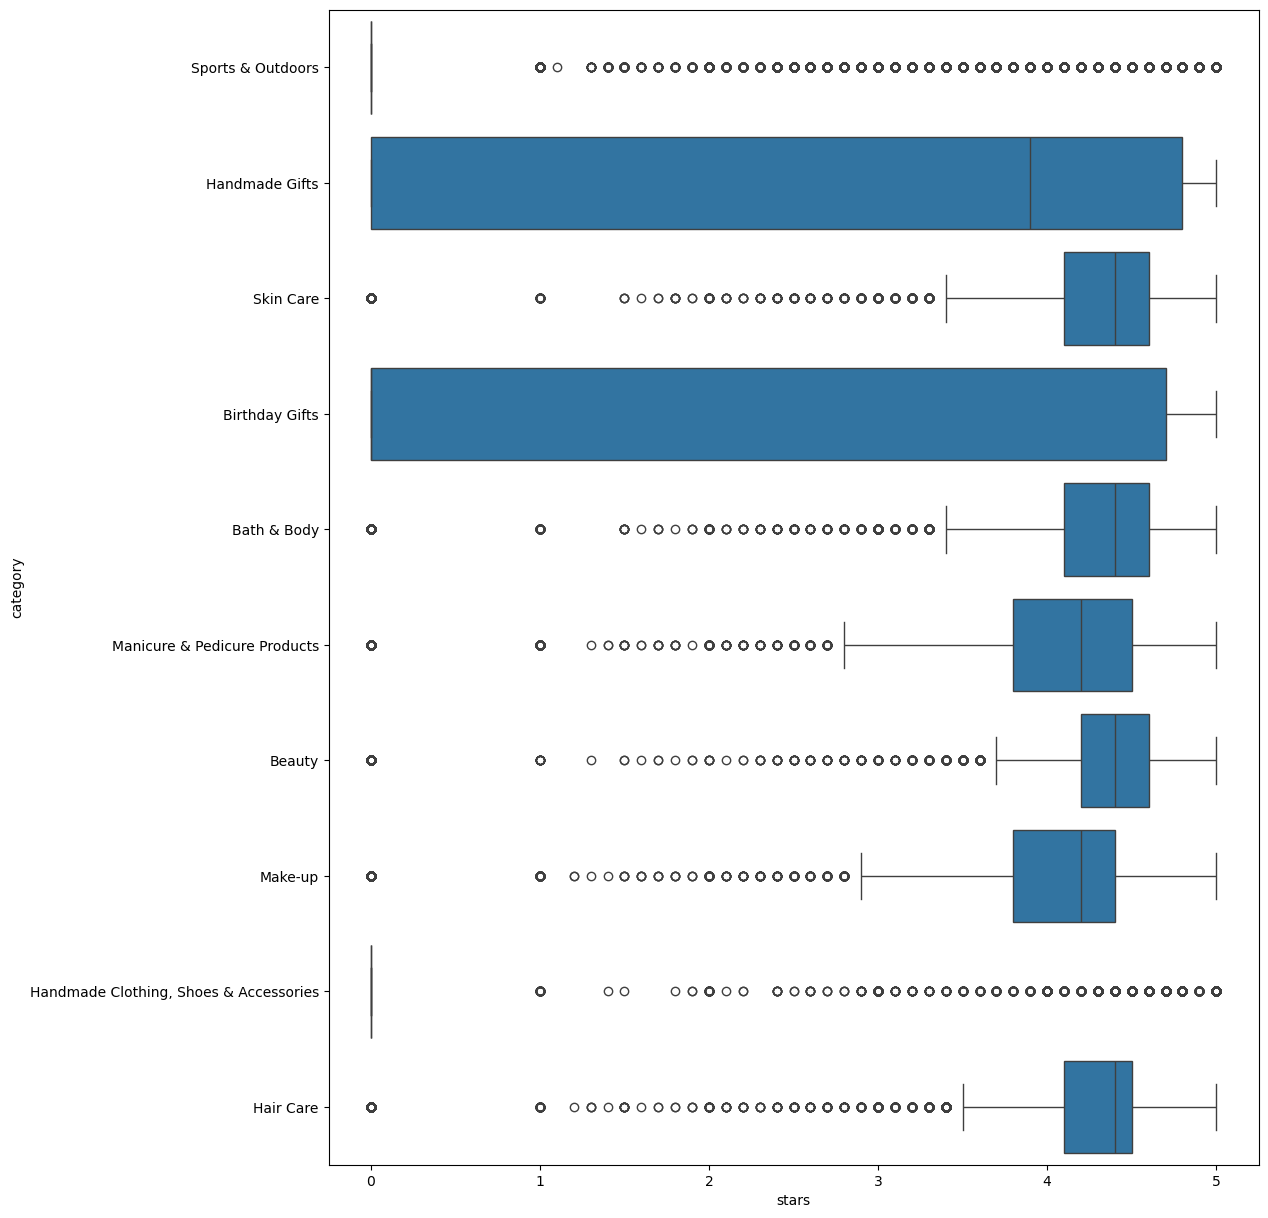

In [360]:
# Box plot

# top 10 categories from previous step
top10_cat = df_no_out['category'].value_counts().nlargest(10).index
# top 10 df
df_top_10 = df_no_out[df_no_out['category'].isin(top10_cat)]
# plot size
plt.figure(figsize=(12, 15))
# box plot
sns.boxplot(data=df_top_10, x='stars', y='category');


In [362]:
# Highest median per category
median_price_cat = df_no_out.groupby('category')['price'].median()
median_price_cat

category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

In [364]:
category_max_median = median_price_cat.idxmax()
max_median = median_price_cat.max()
category_max_median, max_median

('Desktop PCs', 74.0)

Part 3: Investigating the Interplay Between Product Prices and Ratings

In [366]:
# Correlation coefficient - stars-price
correlation1 = df_no_out['price'].corr(df_no_out['stars'])
correlation1

-0.07767299878181352

In [368]:
correlation2 = df_no_out['price'].corr(df_no_out['stars'], method='spearman')
correlation2

-0.06679697280768393

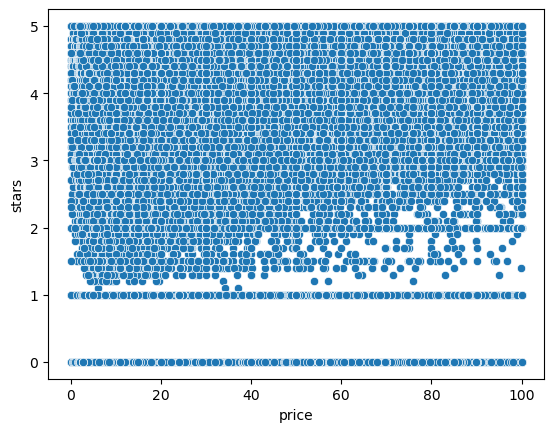

In [372]:
sns.scatterplot(data=df_no_out, x='price', y='stars');

The correlation tests and the scatterplot show that there is no correlation between the price of a product and the stars given in the review.

In [376]:
df_numerical = df_no_out.select_dtypes("number")
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


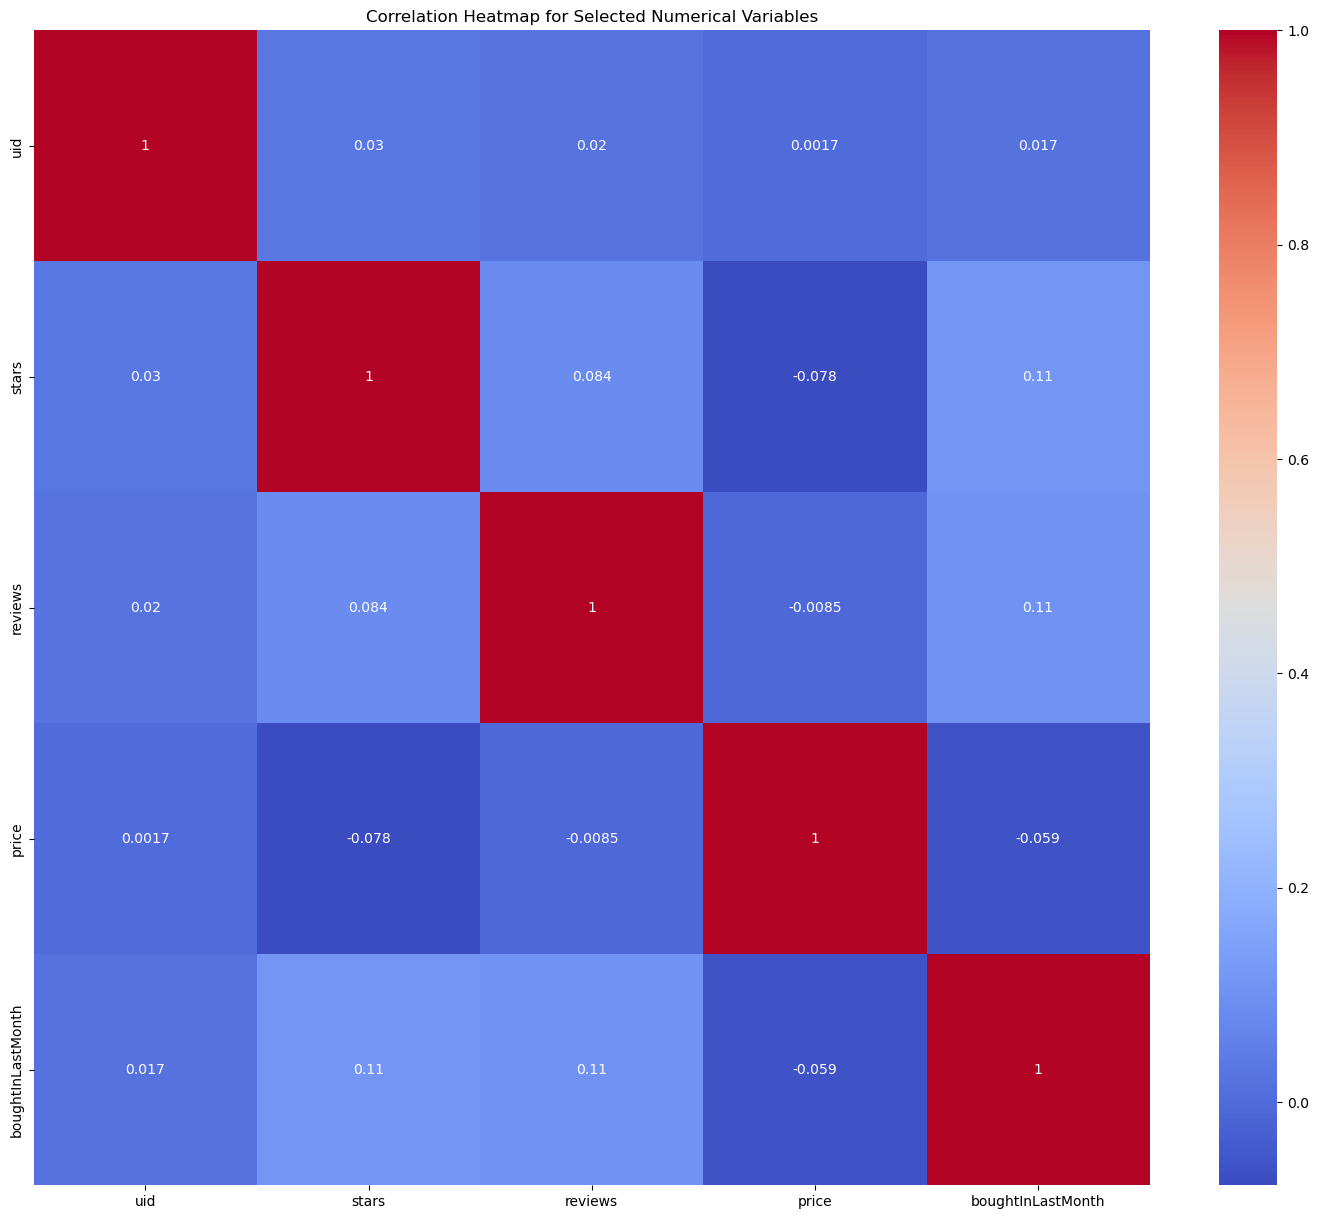

In [379]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

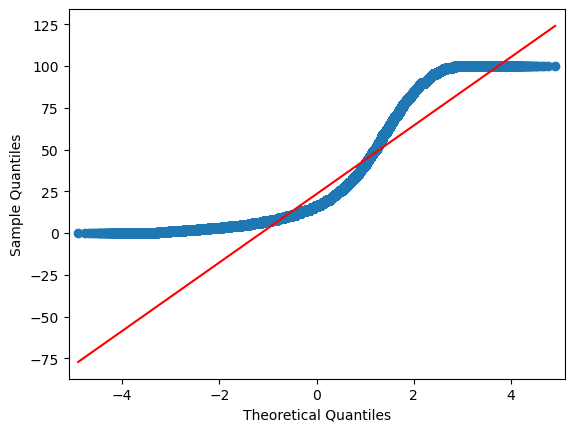

In [383]:
import statsmodels.api as sm

sm.qqplot(df_no_out['price'], line='s');

Prices of products in general deviate from a normal distribution